# **Day1 -> 13th October 2021**.


In [1]:
! pip install -q 'gwosc==0.5.4'

Reason for being yanked: Metadata is broken


In [2]:
import gwosc
print(gwosc.__version__)

0.5.4


##Quering for event info :

gwosc.datsets lib provides tools for searching for datasets, including events, catalogs and full run strain data releases.

In [3]:
import gwosc.datasets

In [4]:
from gwosc.datasets import find_datasets

In [5]:
from gwosc import datasets

In [6]:
# Print list of all available catalogs from the datasets:

print("Catalogs :")
print(find_datasets(type="catalogs"))

Catalogs :
['GWTC-1-confident', 'GWTC-1-marginal', 'GWTC-2', 'Initial_LIGO_Virgo', 'O1_O2-Preliminary', 'O3_Discovery_Papers', 'O3_IMBH_marginal']


In [7]:
# Print all the events from the GWTC-1 catalog

gwtc1 = datasets.find_datasets(type = "events", catalog="GWTC-1-confident")
print("GWTC-1 events :", gwtc1)

GWTC-1 events : ['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


In [8]:
# Print strain data sets from ligo/virgo data sets 

runs = find_datasets(type = "run")

print("Strain data sets : ", runs)

Strain data sets :  ['BKGW170608_16KHZ_R1', 'O1', 'O1_16KHZ', 'O2_16KHZ_R1', 'O2_4KHZ_R1', 'O3a_16KHZ_R1', 'O3a_4KHZ_R1', 'S5', 'S6']


In [9]:
# Print data sets from detector 'L1' and small segment (i.e. GPS time)

print(find_datasets(type = "events", catalog = "GWTC-1-confident", detector = "L1", segment = (1164556817, 1187733618)))

['GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


In [10]:
# gwosc.datasets.event_gps lib is used to query out the specific gps time of the events (GW170608 and GW190425)

from gwosc.datasets import event_gps
gps = event_gps("GW170608")
gps1 = event_gps("GW190425")
print("gps :", (gps,gps1))

gps : (1180922494.5, 1240215503.0)


In [11]:
# gps time interval for an observing runs

from gwosc.datasets import run_segment
print(run_segment("O1"))

(1126051217, 1137254417)


In [12]:
# Confident events in O1 :

O1 = datasets.find_datasets(type = "events", catalog = "GWTC-1-confident", segment = run_segment("O1"))
print(O1)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2']


##Querying for data files

 Use gwosc.locate lib to find the urls of data files associated with the datasets

In [13]:
from gwosc.locate import get_event_urls
urls = get_event_urls("GW150914")
print("url :", urls)

url : ['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']


In [14]:
# Print urls of specific details (specify)

urls = get_event_urls("GW151012", duration = "32", detector = "V3")
print("urls :", urls)

urls : []


## Exercises:


1.   How many months did O2 last?
2.   How many GWTC-1-confident events were detected during O1?
3.   What file URL contains data for V1 4096 seconds around GW170817?



In [15]:
# 2. Confident events in O1

O1 = datasets.find_datasets(type = "events", catalog = "GWTC-1-confident", segment = run_segment("O1"))
print(O1)

# 3. url data for V1 4096 sec around GW170817

urls_1  = get_event_urls("GW170817", duration = 4096, detector = "V1")
print(urls_1)

# 1 O2:

O2 = "O2_4KHZ_R1"
print(run_segment(O2))

time = 1187733618 - 1164556817

print ("Run segment of O2", time/(3600*30*24))







['GW150914-v3', 'GW151012-v3', 'GW151226-v2']
['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170817/v3/V-V1_GWOSC_4KHZ_R1-1187006835-4096.hdf5']
(1164556817, 1187733618)
Run segment of O2 8.941667052469136


#**Day 2 -> 14th October 2021:**

GWpy:

#**DATA in time domain**

In [16]:
! ! pip install -q 'gwpy==2.0.2'

     |████████████████████████████████| 1.4 MB 11.9 MB/s 
     |████████████████████████████████| 51 kB 5.0 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 3.5 MB 79.5 MB/s 


In [17]:
import gwpy

In [18]:
print(gwpy.__version__)

2.0.2


In [19]:
gps = event_gps('GW190412')

print(gps)

1239082262.2


In [20]:
segment = (int(gps)-5, int(gps)+5)
print(segment)

(1239082257, 1239082267)


#**Day 3 -> 18th October 2021**

In [21]:
def from_gps(gps):
    try:
        gps = LIGOTimeGPS(gps)
    except (ValueError, TypeError, RuntimeError):
        gps = LIGOTimeGPS(float(gps))
    sec, nano = gps.gpsSeconds, gps.gpsNanoSeconds
    try:
        date = Time(sec, format='gps', scale='utc').datetime
    except ValueError as exc:
        if "within a leap second" in str(exc):
            exc.args = (
                "cannot represent leap second using datetime.datetime, "
                "consider using "
                "astropy.time.Time({}, format=\"gps\", scale=\"utc\") "
                "directly".format(gps),
            )
        raise
    return date + datetime.timedelta(microseconds=nano*1e-3)



## 1. 'G1' - GEO600
## 2. 'H1' - LIGO-Hanford
## 3. 'L1' - LIGO-Livingston
## 4. 'V1' - (Advanced) Virgo 



In [22]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
print(data)

Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
TimeSeries([-8.42599982e-19, -8.52439382e-19, -8.60740967e-19,
            ...,  1.38851953e-19,  1.37762006e-19,
             1.38095492e-19]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


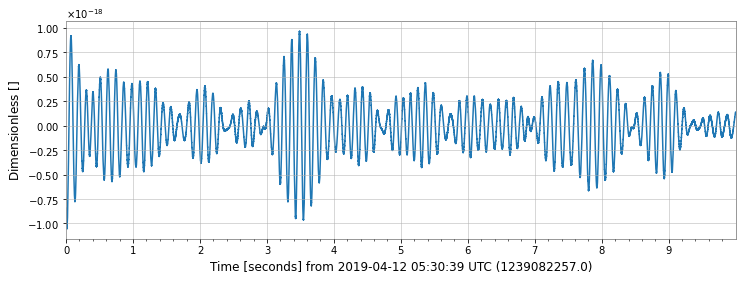

In [23]:
%matplotlib inline
plot = data.plot()

#**Data in Frequency Domain**

Fourier transform : exposes the frequency domain content of a time domain of the signal.


In [24]:
fft = data.fft()
print(fft)

FrequencySeries([-1.45894353e-21+0.00000000e+00j,
                 -2.91834811e-21-4.52905623e-23j,
                 -2.91973217e-21-9.06203059e-23j, ...,
                 -2.38724887e-23+4.67871321e-26j,
                 -2.38346268e-23+1.80394122e-26j,
                 -2.38458080e-23+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.1 Hz,
                epoch: 1239082257.0,
                name: Strain,
                channel: None)


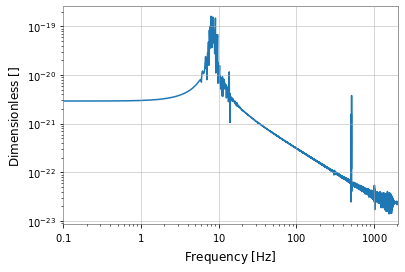

In [25]:
plot = fft.abs().plot(xscale="log", yscale="log")
plot.show(warn=False)

The fft assumes that the data is periodic, which means that the edges of the data look like discontinuities when transformed. So apply a window function to the time domain data before tranforming it. Use scipy.signal module and import get_window from it. 

In [26]:
# window function:

from scipy.signal import get_window
window = get_window('hann', data.size)
lwin = data * window

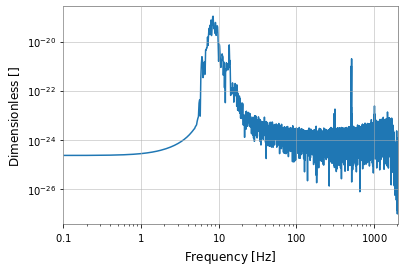

In [27]:
# transforming the signal into frequency domain:

fftamp = lwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

#**Power Spectral Density**

**Welch's method** is used to calcualate the power of a signal at different frequencies. The method is based on the concept of using periodogram spectrum estimates, which are the result of converting a signal from the time domain to the frequency domain. Welch's method is an improvement on the standard periodogram spectrum estimating method and on Bartlett's method, in that it reduces noise in the estimated power spectra in exchange for reducing the frequency resolution. Due to the noise caused by imperfect and finite data, the noise reduction from Welch's method is often desired.

### **Procedure to calculate the PSD:**

1. The signal is split up into overlapping segments: the original data segment is split up into L data segments of length M, overlapping by D points.
     1. If D = M / 2, the overlap is said to be 50%
     2. If D = 0, the overlap is said to be 0


 2. The overlapping segments are then windowed: After the data is split up into overlapping segments, the individual L data segments have a window applied to them (in the time domain).

     1. Most window functions afford more influence to the data at the center of the set than to data at the edges, which represents a loss of information. To mitigate that loss, the individual data sets are commonly overlapped in time (as in the above step).

     2. The windowing of the segments is what makes the Welch method a "modified" periodogram. 

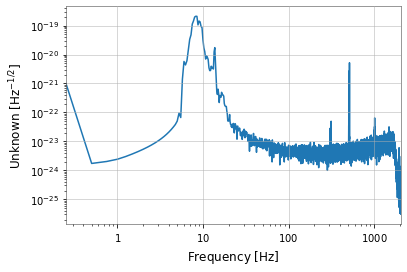

In [28]:
# fft plot. "ASD" is used to study the frequency domain sensitivity of a Gw detector.

asd = data.asd(fftlength=4, method="median")         
plot = asd.plot()
plot.show(warn=False)

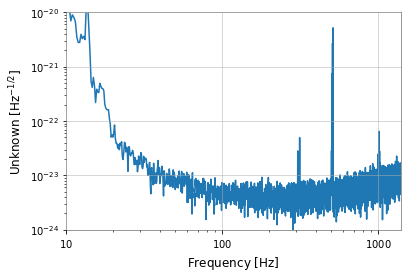

In [29]:
# fft plot from 10Hz to 1000Hz.

ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot

In [30]:
# Loading more data for more ffts to be averaged out. Can analyse in more details.

segment1 = (int(gps)-400, int(gps)+400)
print(segment1)

(1239081862, 1239082662)


In [31]:
data2 = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
print(data2)

Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
TimeSeries([-8.42599982e-19, -8.52439382e-19, -8.60740967e-19,
            ...,  1.38851953e-19,  1.37762006e-19,
             1.38095492e-19]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [32]:
asd1 = data2.asd(fftlength=8, method="median")

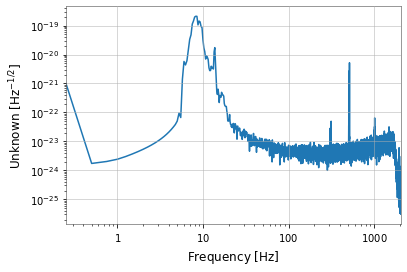

In [33]:
plot = asd.plot()

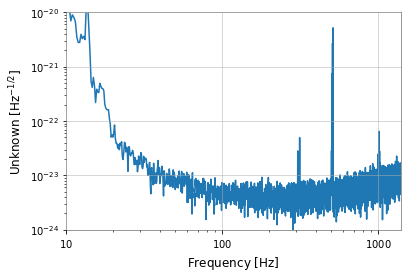

In [34]:
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot

Fetched 1 URLs from www.gw-openscience.org for [1239081862 .. 1239082662))
Reading data... [Done]
Ligo-Hanford : TimeSeries([-3.42589875e-19, -3.43634108e-19, -3.38996775e-19,
            ..., -4.40490128e-19, -4.38564550e-19,
            -4.40217026e-19]
           unit: dimensionless,
           t0: 1239081862.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
Ligo-Virgo : TimeSeries([-4.14628280e-20, -2.16068322e-20,  8.49382876e-21,
            ...,  1.97669207e-20, -7.11263366e-21,
            -2.44333694e-20]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


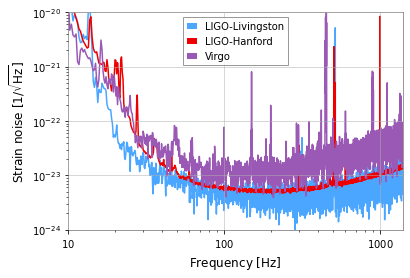

In [35]:
# Comparing with different detectors keeping the same configurations.

# Ligo-Hanford
Hdata = TimeSeries.fetch_open_data('H1', *segment1, verbose = True)
print('Ligo-Hanford :', Hdata)
hasd = Hdata.asd(fftlength=4, method="median")

# Ligo-Virgo
Vdata = TimeSeries.fetch_open_data('V1', *segment, verbose = True)
print('Ligo-Virgo :', Vdata)
vasd = Vdata.asd(fftlength=4, method="median")

ax.plot(hasd, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(vasd, label='Virgo', color='gwpy:virgo')

lline = ax.lines[0]
lline.set_color('gwpy:ligo-livingston')  
lline.set_label('LIGO-Livingston')
plot

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot


The peak amplitude in the LIGO-Livingston data occurs at approximately 5 seconds into the plot above and is undetectable above the background noise by the eye. Plot the data for the LIGO-Hanford detector around GW190412. Looking at your new LIGO-Handford plot, can your eye identify a signal peak?

(1239081862, 1239082662)
Fetched 1 URLs from www.gw-openscience.org for [1239081862 .. 1239082662))
Reading data... [Done]
TimeSeries([-3.42589875e-19, -3.43634108e-19, -3.38996775e-19,
            ..., -4.40490128e-19, -4.38564550e-19,
            -4.40217026e-19]
           unit: dimensionless,
           t0: 1239081862.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
FrequencySeries([2.64734760e-24+0.00000000e+00j,
                 5.29469460e-24+7.86249693e-28j,
                 5.29469566e-24+1.58150526e-27j, ...,
                 3.43793743e-26-4.64482949e-27j,
                 2.83461010e-26+4.84956578e-27j,
                 3.40805409e-26+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.00125 Hz,
                epoch: 1239081862.0,
                name: Strain,
                channel: None)


No handles with labels found to put in legend.


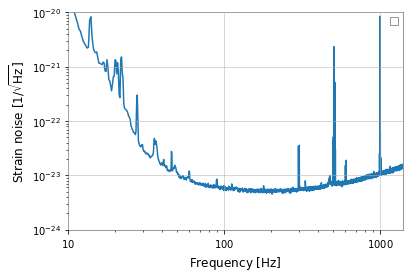

In [36]:
gps = event_gps('GW190412')

hsegment = (int(gps)-400, int(gps)+400)
print(hsegment)

hdata2 = TimeSeries.fetch_open_data('H1', *hsegment, verbose = True)
print(hdata2)

%matplotlib inline
plot = hdata2.plot()
plot


fft = hdata2.fft()
print(fft)

plot1 = fft.abs().plot(xscale="log", yscale="log")
plot1.show(warn=False)

hasd2 = hdata2.asd(fftlength=4, method="median")         
plot2 = hasd2.plot()
plot2.show(warn=False)

ax = plot2.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()


Make an ASD around the time of an O1 event, GW150914 for L1 detector.  Compare this with the ASDs around GW190412 for L1 detector.  Which data have lower noise - and so are more sensitive - around 100 Hz?

(1126258862, 1126260062)
Fetched 1 URLs from www.gw-openscience.org for [1126258862 .. 1126260062))
Reading data... [Done]
TimeSeries([-1.32667267e-18, -1.33092958e-18, -1.34311735e-18,
            ..., -9.36851342e-19, -9.29072758e-19,
            -8.91527139e-19]
           unit: dimensionless,
           t0: 1126258862.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


FrequencySeries([-1.05513656e-18+0.00000000e+00j,
                 -7.62918302e-22+1.96067025e-21j,
                  5.29488218e-22+8.15412613e-22j, ...,
                 -9.90963552e-26-7.85885510e-27j,
                 -8.51257811e-26+3.29079178e-27j,
                 -8.92643344e-26+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.0008333333333333334 Hz,
                epoch: 1126258862.0,
                name: Strain,
                channel: None)


No handles with labels found to put in legend.


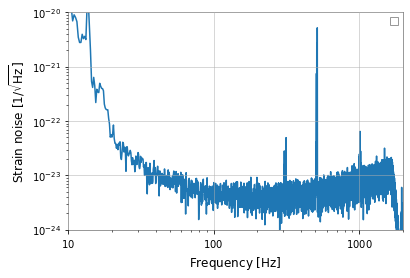

In [37]:
gps = event_gps('GW150914')

lsegment = (int(gps)-600, int(gps)+600)
print(lsegment)

ldata2 = TimeSeries.fetch_open_data('L1', *lsegment, verbose = True)
print(ldata2)

%matplotlib inline
plot = ldata2.plot()


fft = ldata2.fft()
print(fft)

plot1 = fft.abs().plot(xscale="log", yscale="log")
plot1.show(warn=False)


lasd2 = ldata2.asd(fftlength=4, method="median")         
plot2 = asd.plot()
plot2.show(warn=False)

ax = plot2.gca()
ax.set_xlim(10, 2000)
ax.set_ylim(1e-24, 1e-20)

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()



(10, 2000)

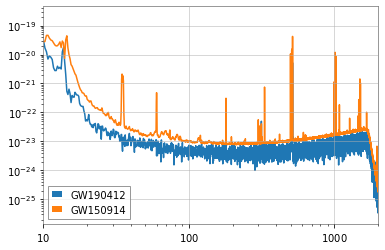

In [38]:
import pylab as plt

plt.loglog(asd, label = 'GW190412')
plt.loglog(lasd2,label = 'GW150914')
plt.legend()
plt.xlim(10,2000)

#**Q Transforms**

Plotting a Spectrogram

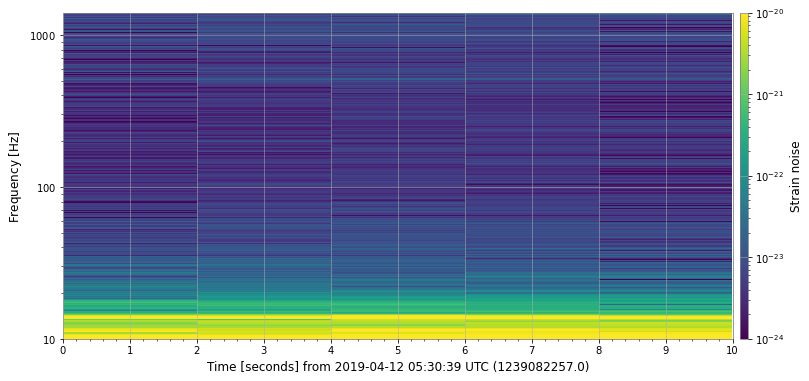

In [39]:
spec = data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = spec.plot()

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise",
)



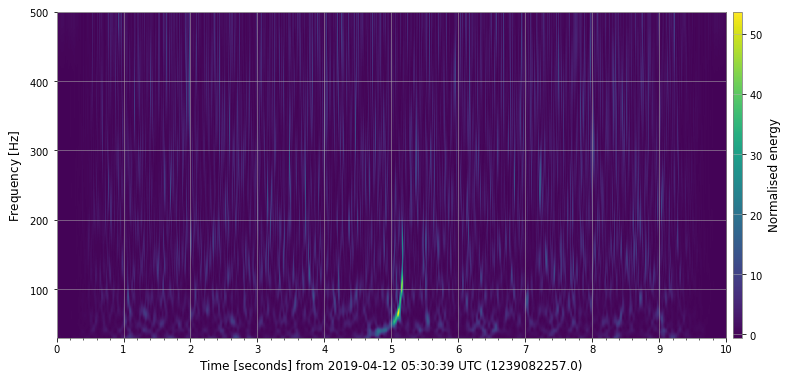

In [40]:
hq = data.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")


# Q-transforms returns normalised energy.

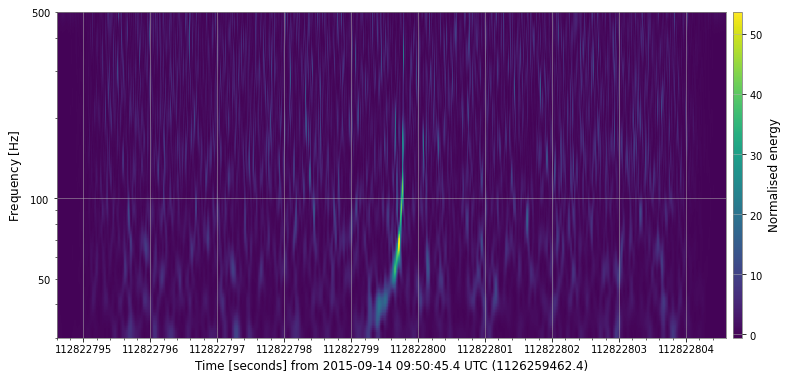

In [41]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot  # refresh

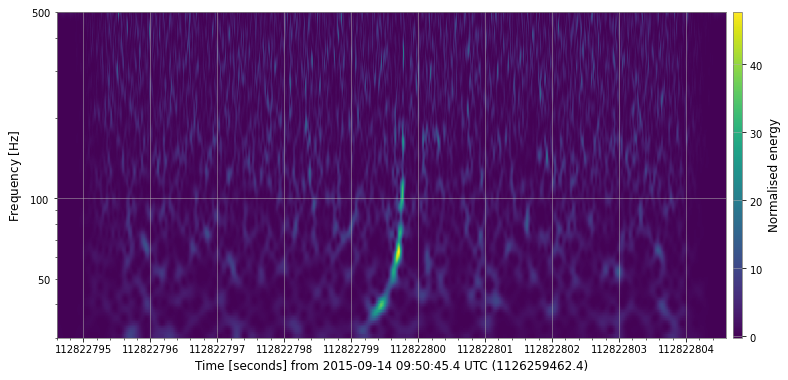

In [42]:
hq = data.q_transform(frange=(30, 500), qrange=(16, 32))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")


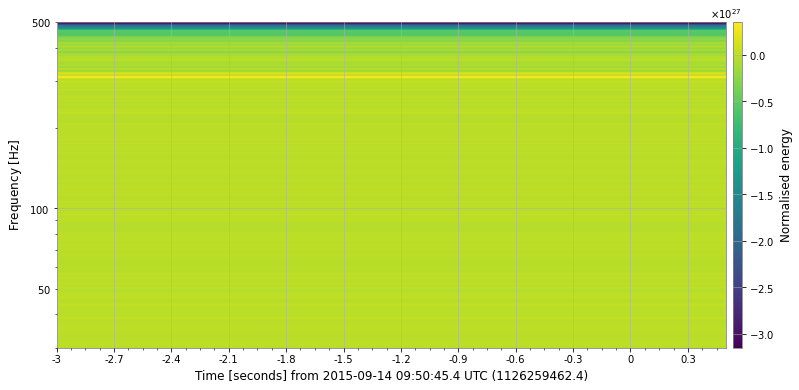

In [43]:
hq2 = data.q_transform(frange=(30, 500), qrange=(100, 110), outseg=(gps-3,gps+0.5)) # outseg is for zoom in around merger
plot = hq2.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

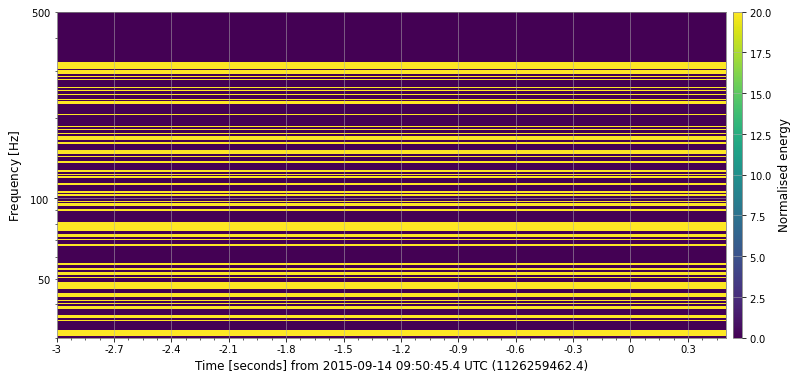

In [44]:
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot